# COMP0005 - GROUP COURSEWORK
# Experimental Evaluation of Search Data Structures and Algorithms

The cell below defines **AbstractSearchInterface**, an interface to support basic insert/search operations; you will need to implement this three times, to realise your three search data structures of choice among: (1) *2-3 Tree*, (2) *AVL Tree*, (3) *LLRB BST*; (4) *B-Tree*; and (5) *Scapegoat Tree*. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [35]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

class AbstractSearchInterface(ABC):
    '''
    Abstract class to support search/insert operations (plus underlying data structure)
    
    '''
        
    @abstractmethod
    def insertElement(self, element):     
        '''
        Insert an element in a search tree
            Parameters:
                    element: string to be inserted in the search tree (string)

            Returns:
                    "True" after successful insertion, "False" if element is already present (bool)
        '''
        
        pass 
    

    @abstractmethod
    def searchElement(self, element):
        '''
        Search for an element in a search tree
            Parameters:
                    element: string to be searched in the search tree (string)

            Returns:
                    "True" if element is found, "False" otherwise (bool)
        '''

        pass

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [36]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE

class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class LLRBNode(Node):
    def __init__(self, key, is_red=True):
        super().__init__(key)
        self.is_red = is_red

class BTreeNode:
    def __init__(self, order, isLeaf):
        self.keys = []
        self.children = []
        self.order = order
        self.isLeaf = isLeaf

    def is_keys_full(self):
        return len(self.keys) == self.order - 1
    
    def is_children_full(self):
        return len(self.children) == self.order

    def insert_non_full(self, key):
        i = len(self.keys) - 1
        if self.isLeaf:
            self.keys.append(None)
            while i >= 0 and self.keys[i] > key:
                self.keys[i + 1] = self.keys[i]
                i -= 1
            self.keys[i + 1] = key
        else:
            child_index = self.find_potential_child_with_key(key)
            if len(self.children[child_index].keys) == self.order - 1:
                self.split_child(child_index)
                if key > self.keys[child_index]:
                    child_index += 1
            self.children[child_index].insert_non_full(key)

    def split_child(self, index):
        order = self.order
        min_keys = (order - 1) // 2 
        child = self.children[index]
        new_node = BTreeNode(order, child.isLeaf)
        mid_key = child.keys[min_keys]
        new_node.keys = child.keys[min_keys + 1:]
        child.keys = child.keys[:min_keys]
        if not child.isLeaf:
            new_node.children = child.children[min_keys + 1:]
            child.children = child.children[:min_keys + 1] 
        self.children.insert(index + 1, new_node)
        self.keys.insert(index, mid_key)

    def insert_key(self, key):
        if len(self.keys) == self.order - 1: 
            new_root = BTreeNode(self.order, False)
            new_root.children.append(self)
            new_root.split_child(0)
            child_index = 0 if key < new_root.keys[0] else 1
            new_root.children[child_index].insert_non_full(key)
            return new_root
        else:
            self.insert_non_full(key)
            return self

    def find_key_within_keys(self, key):
        keys = self.keys
        left, right = 0, len(keys) - 1
        while left <= right:
            mid = (left + right) // 2
            if keys[mid] == key:
                return True
            elif keys[mid] < key:
                left = mid + 1
            else:
                right = mid - 1
        return False
    
    def find_potential_child_with_key(self, key):
        keys = self.keys
        left, right = 0, len(keys) - 1
        while left <= right:
            mid = (left + right) // 2
            if keys[mid] < key:
                left = mid + 1
            else:
                right = mid - 1
        return left

    def search_key(self, key):
        if self.find_key_within_keys(key):
            return True
        if self.isLeaf:
            return False
        child_index = self.find_potential_child_with_key(key)
        return self.children[child_index].search_key(key)


Use the cell below to implement the requested API by means of **2-3 Tree** (if among your chosen data structure).

In [37]:
class TwoThreeTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found    

Use the cell below to implement the requested API by means of **AVL Tree** (if among your chosen data structure).

In [38]:
class AVLTree(AbstractSearchInterface):
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found  

Use the cell below to implement the requested API by means of **LLRB BST** (if among your chosen data structure).

In [39]:


class LLRBBST(AbstractSearchInterface):
        
    def __init__(self):
        self.root = None

    def isRed(self, node):
        if node is None:
            return False
        return node.is_red

    def rotateLeft(self, h):
        x = h.right
        h.right = x.left
        x.left = h
        # Inherit h's color; h becomes red
        x.is_red = h.is_red
        h.is_red = True
        return x

    def rotateRight(self, h):
        x = h.left
        h.left = x.right
        x.right = h
        # Inherit h's color; h becomes red
        x.is_red = h.is_red
        h.is_red = True
        return x

    def flipColors(self, h):
        h.is_red = not h.is_red
        if h.left:
            h.left.is_red = not h.left.is_red
        if h.right:
            h.right.is_red = not h.right.is_red

    def _insert(self, h, key):
        if h is None:
            return LLRBNode(key, True), True

        inserted = False 
        if key < h.key:
            h.left, inserted = self._insert(h.left, key)
        elif key > h.key:
            h.right, inserted = self._insert(h.right, key)
        else:
            return h, False

        if self.isRed(h.right) and not self.isRed(h.left):
            h = self.rotateLeft(h)
        if self.isRed(h.left) and self.isRed(h.left.left):
            h = self.rotateRight(h)
        if self.isRed(h.left) and self.isRed(h.right):
            self.flipColors(h)

        return h, inserted

    def insertElement(self, key):
        self.root, inserted = self._insert(self.root, key)
        if inserted:
            # Root must always be black after insertion
            self.root.is_red = False
        return inserted

    def searchElement(self, key):
        current = self.root
        while current is not None:
            if key < current.key:
                current = current.left
            elif key > current.key:
                current = current.right
            else:
                return True
        return False

    def inorderTraversal(self):
        """
        Return a list of all keys in ascending order.
        """
        result = []
        self._inorderTraversalHelper(self.root, result)
        return result

    def _inorderTraversalHelper(self, node, result):
        """
        Private helper for the in-order traversal.
        """
        if node is None:
            return
        self._inorderTraversalHelper(node.left, result)
        result.append(node.key)
        self._inorderTraversalHelper(node.right, result)
    
    
if __name__ == "__main__":
    tree = LLRBBST()
    tree.insertElement("hello")
    tree.insertElement("hell")
    tree.insertElement("hel")
    tree.insertElement("he")
    tree.inorderTraversal()

Use the cell below to implement the requested API by means of **B-Tree** (if among your chosen data structure).

In [40]:
class BTree(AbstractSearchInterface):
    
    def __init__(self, order = 3):
        self.root: BTreeNode = None
        self.order = order

    def insertElement(self, element):
        if self.root is None:
            self.root = BTreeNode(self.order, True)
            self.root.keys.append(element)
        else:
            self.root = self.root.insert_key(element)
        return True

    def searchElement(self, element):
        root = self.root
        if root is None:
            return False
        return root.search_key(element)
    
    def print_btree(self, node=None, level=0):
        if node is None:
            node = self.root
        if node is None:
            return
        indent = "    " * level
        print(f"{indent}Level {level}: Keys: {node.keys}")
        if not node.isLeaf:
            for child in node.children:
                self.print_btree(child, level + 1)

if __name__ == "__main__":
    btree_test = BTree(3)
    btree_test.insertElement(10)
    btree_test.insertElement(20)
    btree_test.insertElement(30)
    btree_test.insertElement(12)
    btree_test.insertElement(15)
    btree_test.insertElement(22)
    btree_test.insertElement(29)
    btree_test.insertElement(42)
    btree_test.insertElement(7)
    btree_test.insertElement(13)
    btree_test.print_btree()
    print(btree_test.searchElement(22))
    print(btree_test.searchElement(438))

Level 0: Keys: [20]
    Level 1: Keys: [12]
        Level 2: Keys: [7, 10]
        Level 2: Keys: [13, 15]
    Level 1: Keys: [30]
        Level 2: Keys: [22, 29]
        Level 2: Keys: [42]
True
False


Use the cell below to implement the requested API by means of **Scapegoat Tree** (if among your chosen data structure).

In [41]:
import math

class ScapegoatTree(AbstractSearchInterface):

    def __init__(self, alpha = 0.7):
        self.root = None
        self.noOfNodes = 0
        self.alpha = alpha      #Constant in the range (0.5,1)
        self.maxDepth = 1


    def size(self, node: Node) -> int:
        if node == None:
            return 0
        return 1 + self.size(node.left) + self.size(node.right)


    def updateMaxDepth(self):
        #This is only called when a node is inserted
        self.maxDepth = math.floor(math.log(self.noOfNodes, 1/self.alpha))

    def insertHelper(self, insertNode: Node, treeNode: Node, nodePath: list[Node]):
        nodePath.append(treeNode)
        if insertNode.key < treeNode.key:
            if treeNode.left is None:
                return nodePath, "l"
            return self.insertHelper(insertNode, treeNode.left, nodePath)
        elif insertNode.key > treeNode.key:
            if treeNode.right is None:
                return nodePath, "r"
            return self.insertHelper(insertNode, treeNode.right, nodePath)
        return None             #If None is returned then insertNode.key == treeNode.key (insertNode key already exists in tree)
    

    def connectInsertionNode(self, insertedPathAndDir, insertedElement):
        if insertedPathAndDir[1] == "l":
            insertedPathAndDir[0][-1].left = insertedElement
        else:
            insertedPathAndDir[0][-1].right = insertedElement


    def insertElement(self, element):
        inserted = False

        if self.root is None:           #inserting initial item
            self.root = Node(element)
            self.noOfNodes += 1
            self.updateMaxDepth()
            return True
        
        insertedElement = Node(element)
        insertedPathAndDir = self.insertHelper(insertedElement, self.root, [])
        if insertedPathAndDir:
            self.connectInsertionNode(insertedPathAndDir, insertedElement)
            inserted = True
            self.noOfNodes += 1
            self.updateMaxDepth()
            if len(insertedPathAndDir[0]) > self.maxDepth:
                self.rebuildSubtree(self.scapegoat(insertedPathAndDir))
        return inserted
    

    def scapegoat(self, insertedPathAndDir):
        path = insertedPathAndDir[0]   
        if insertedPathAndDir[1] == "l":
            currentNode = path[-1].left
        else:
            currentNode = path[-1].right
        
        scapegoatFound = False
        currentSize = -1

        while not(scapegoatFound):
            parentNode = path.pop()

            if currentNode == parentNode.left:
                siblingNode = parentNode.right
            else:
                siblingNode = parentNode.left

            if currentSize < 0:
                currentSize = self.size(currentNode)
            siblingSize = self.size(siblingNode)
            parentSize = currentSize + siblingSize + 1

            if currentSize / parentSize <= self.alpha:
                currentNode = parentNode
                currentSize = parentSize
            else:
                scapegoatFound = True
        return parentNode, path.pop() #Returns scapegoat and parent of scapegoat so we can reattach rebuilt subtree
    

    def inOrderTraversal(self, node: Node):
        if node == None:
            return []
        return self.inOrderTraversal(node.left) + [node] + self.inOrderTraversal(node.right)


    def rebuildSubtree(self, scapegoatPair):
        scapegoatNode = scapegoatPair[0]
        parentNode = scapegoatPair[1]
        orderedNodeList = self.inOrderTraversal(scapegoatNode)
        end = len(orderedNodeList)-1
        rootIndex = end // 2
        subRoot = orderedNodeList[rootIndex]
        if parentNode.left == scapegoatNode:
            parentNode.left = subRoot
        else:
            parentNode.right = subRoot
        subRoot.left = self.rebuildHelper(orderedNodeList, 0, rootIndex-1)
        subRoot.right = self.rebuildHelper(orderedNodeList, rootIndex+1, end)


    def rebuildHelper(self, nodeList: list[Node], start: int, end: int):
        if start <= end:
            rootIndex = (end + start) // 2
            root = nodeList[rootIndex]
            root.left = self.rebuildHelper(nodeList, start, rootIndex-1)
            root.right = self.rebuildHelper(nodeList, rootIndex+1, end)
            return root
            

    def searchElement(self, element):     
        found = False
        if self.insertHelper(Node(element), self.root, []) == None:
            found = True        #insertHelper takes in an insert Node and starting Node (root) and returns the correct Parent Node and direction for us to insert the Node in
                                #if None is returned then we couldn't find a suitable place to put it in (i.e. Node with that key already exists)
        return found 
    


#Test data mainly copied from geeksforgeeks; when opening debugger the final tree is the same as theirs so im assuming this works for now
tree = ScapegoatTree(0.67)
tree.insertElement("7") 
tree.insertElement("6") 
tree.insertElement("8") 
tree.insertElement("5") 
tree.insertElement("9") 
tree.insertElement("2") 
tree.insertElement("1") 
tree.insertElement("4") 
tree.insertElement("0") 
tree.insertElement("3") 
tree.insertElement("3.5")
print(tree.searchElement("4"))
print(tree.searchElement("11"))
print([x.key for x in tree.inOrderTraversal(tree.root)])
    

True
False
['0', '1', '2', '3', '3.5', '4', '5', '6', '7', '8', '9']


Use the cell below to implement the **synthetic data generator** needed by your experimental framework (be mindful of code readability and reusability).

In [42]:
import string
import random

class TestDataGenerator():
    
    def __init__(self, num_samples=1000):
        self.num_samples = num_samples
        self.letters = string.ascii_letters
        self.lowercase = string.ascii_lowercase

    #random strings of fixed length
    def gen_rand(self, strlen):
        result = []
        for _ in range(self.num_samples):
            result.append(''.join(random.choices(self.letters, k=strlen)))
        return result
    
    # of the form: [aaa, aab, aac, aad, aae, aaf..... aba, abb, abc, abd]
    def gen_sorted(self, strlen, reversed=False):
        if len(self.letters)**strlen < self.num_samples:
            print("Not enough combinations. Use a larger string length")
            return
        
        
        characters = self.lowercase if not reversed else self.lowercase[::-1]
        
        def generate_combinations(prefix, length):
            if length == 0:
                result.append(prefix)
                return
            for char in characters:
                if len(result) >= self.num_samples:
                    return
                generate_combinations(prefix + char, length - 1)
        
        result = []
        generate_combinations('', strlen)
        return result
            
    
    def gen_duplicate(self):
        result = []
        for _ in range(self.num_samples):
            result.append('a')
        return result
    
    def gen_rand_len(self, lo, hi):
        result = []
        for _ in range(self.num_samples):
            result.append(''.join(random.choices(self.letters, k=random.randint(lo, hi))))
        return result
    
    def gen_increasing_len(self):
        cur_len = 1
        result = []
        for _ in range(self.num_samples):
            result.append(''.join(random.choices(self.letters, k=cur_len)))
            cur_len += 1
        return result
    
    def gen_huge_len(self, scalar):
        result = []
        for _ in range(self.num_samples):
            result.append(''.join(random.choices(self.letters, k=2**scalar)))
        return result

Use the cell below to implement the requested **experimental framework** (be mindful of code readability and reusability).

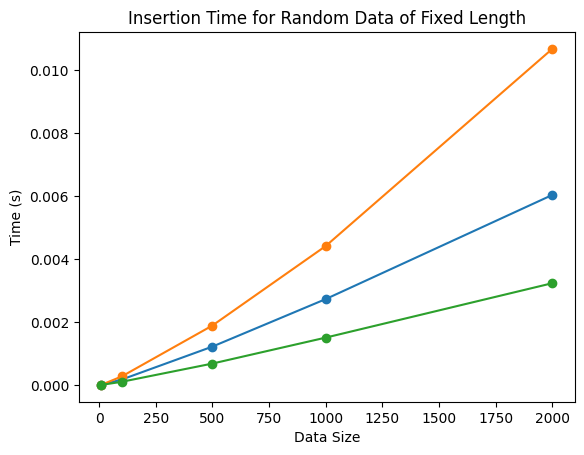

In [54]:
import timeit
import matplotlib.pyplot as plt
import random

class ExperimentalFramework:
    
    def __init__(self):
        self.sizes = [10, 100, 500, 1000, 2000]
        self.trees = [LLRBBST, ScapegoatTree, BTree]
        self.datasets = {}
        self.results = {}
        self.create_datasets()
        self.init_results()
    
    def create_datasets(self):
            gen = TestDataGenerator(max(self.sizes))
            self.datasets = {
                "random": gen.gen_rand(5), #length of each string
                "sorted": gen.gen_sorted(5), #length of each string
                "reverse_sorted": gen.gen_sorted(5, reversed=True),
                "random_length": gen.gen_rand_len(1, 10), #random length between lo and hi
                "duplicate": gen.gen_duplicate(),
                "increasing_length": gen.gen_increasing_len(),
                "huge_length": gen.gen_huge_len(10) #the exponent of 2 i.e 2^(arg)
            }
            
    def init_results(self):
        for size in self.sizes:
            self.results[size] = {
                "random": {},
                "sorted": {},
                "reverse_sorted": {},
                "random_length": {},
                "duplicate": {},
                "increasing_length": {},
                "huge_length": {}
            }
            for data_type in self.results[size]:
                for tree in self.trees:
                    self.results[size][data_type][tree.__name__] = {
                        "class": tree,
                        "insertion": 0,
                        "search": 0
                    }
    
    def run_experiment(self):
        for size, data_types in self.results.items():
            for data_type, trees in data_types.items():
                for tree in trees:
                    tree_class = self.results[size][data_type][tree]["class"]
                    insertion_time, search_time = self.time_insert_search(size, data_type, tree_class)
                
                    self.results[size][data_type][tree]["insertion"] = insertion_time
                    self.results[size][data_type][tree]["search"] = search_time
    
    
    #times the insertion of a certain size and type of data, scrambles the order of the data, then times the search of all the data
    def time_insert_search(self, size, data_type, tree):
        
        tree_obj = tree()
        data = self.datasets[data_type][:size]
        insertion = '''
for element in data:
    tree_obj.insertElement(element)
        '''
        
        insertion_time = timeit.timeit(stmt=insertion, number=1, globals={'tree_obj': tree_obj, 'data': data})
        
        random.shuffle(data)
        search = '''
for element in data:
    tree_obj.searchElement(element)
        '''
        
        search_time = timeit.timeit(stmt=search, number=1, globals={'tree_obj': tree_obj, 'data': data})
        
        return insertion_time, search_time
    
    
    def get_results(self, data_type, tree, insertion_or_search):
        times = []
        for size, data_sets in self.results.items():
            times.append(data_sets[data_type][tree][insertion_or_search])
        return times
    
    def plot_results(self):
        '''
        for each data type
            plot insertion time for 
                insertion time for rand_data fixed length
                time taken y axis
                size on x axis
                3 lines of different colour for each tree 
                
            plot search time for searching all the elements but in a random order 
        '''
        llrb_times = self.get_results("random", "LLRBBST", "insertion")
        b_times = self.get_results("random", "BTree", "insertion")
        Scapegoat_times = self.get_results("random", "ScapegoatTree", "insertion")
        
        plt.plot(self.sizes, llrb_times, marker='o')
        plt.plot(self.sizes, b_times, marker='o')
        plt.plot(self.sizes, Scapegoat_times, marker='o')
        plt.title("Insertion Time for Random Data of Fixed Length")
        plt.xlabel("Data Size")
        plt.ylabel("Time (s)")

# Example usage
fw = ExperimentalFramework()
fw.run_experiment()
fw.plot_results()


Use the cell below to illustrate the python code you used to **fully evaluate** your three chosen search data structures and algortihms. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each data structure using such data, collect information about their execution time, plot results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [ ]:
# ADD YOUR TEST CODE HERE 



